In [4]:
import pydotplus as pydot
from IPython.display import Image, SVG

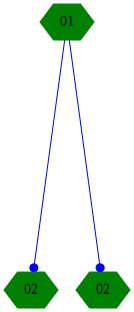

In [5]:
graph = pydot.graph_from_dot_data(open('twopi2.gv.txt').read())
svg = graph.create_svg()
SVG(svg)

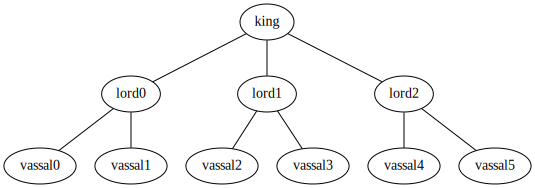

In [6]:


# first you create a new graph, you do that with pydot.Dot()
graph = pydot.Dot(graph_type='graph')

# the idea here is not to cover how to represent the hierarchical data
# but rather how to graph it, so I'm not going to work on some fancy
# recursive function to traverse a multidimensional array...
# I'm going to hardcode stuff... sorry if that offends you

# let's add the relationship between the king and vassals
for i in range(3):
    # we can get right into action by "drawing" edges between the nodes in our graph
    # we do not need to CREATE nodes, but if you want to give them some custom style
    # then I would recomend you to do so... let's cover that later
    # the pydot.Edge() constructor receives two parameters, a source node and a destination
    # node, they are just strings like you can see
    edge = pydot.Edge("king", "lord%d" % i)
    # and we obviosuly need to add the edge to our graph
    graph.add_edge(edge)

# now let us add some vassals
vassal_num = 0
for i in range(3):
    # we create new edges, now between our previous lords and the new vassals
    # let us create two vassals for each lord
    for j in range(2):
        edge = pydot.Edge("lord%d" % i, "vassal%d" % vassal_num)
        graph.add_edge(edge)
        vassal_num += 1

# ok, we are set, let's save our graph into a file
svg = graph.create_svg()
SVG(svg)
# and we are done!

In [7]:
dot_object = pydot.Dot(graph_name="main_graph",rankdir="LR", labelloc='b', 
                       labeljust='r', ranksep=1)
dot_object.set_node_defaults(shape='circle', fixedsize='true',
                             height=.85, width=.85, fontsize=24)
node_eta = pydot.Node(name='eta', texlbl=r'\eta', label='<&#951;>')
dot_object.add_node(node_eta)

node_alpha = pydot.Node(name='alpha', texlbl=r'\alpha', label="<&#945;>")
dot_object.add_node(node_alpha)
# K plate
plate_k = pydot.Cluster(graph_name='plate_k', label='K', fontsize=24)
node_beta = pydot.Node(name='beta', texlbl=r'\beta', label='<&#946;<SUB>k</SUB>>')
plate_k.add_node(node_beta)

# add plate k to graph
dot_object.add_subgraph(plate_k)

# M plate
plate_M = pydot.Cluster(graph_name='plate_M', label='M', fontsize=24)
node_theta = pydot.Node(name='theta', texlbl=r'\theta',
                        label='<&#952;<SUB>m</SUB>>')
plate_M.add_node(node_theta)

# N plate
plate_N = pydot.Cluster(graph_name='plate_N', label='N', fontsize=24)
node_z = pydot.Node(name='z', texlbl='z_{m,n}', label='<z<SUB>m,n</SUB>>')
plate_N.add_node(node_z)
node_w = pydot.Node(name='w', texlbl='w_{m,n}', label='<w<SUB>m,n</SUB>>', 
                    style='filled', fillcolor='lightgray')
plate_N.add_node(node_w)

plate_M.add_subgraph(plate_N)
dot_object.add_subgraph(plate_M)


In [8]:
# Add the edges
dot_object.add_edge(pydot.Edge(node_alpha, node_theta))
dot_object.add_edge(pydot.Edge(node_theta, node_z))
dot_object.add_edge(pydot.Edge(node_z, node_w))
dot_object.add_edge(pydot.Edge(node_w, node_beta, dir='back'))
dot_object.add_edge(pydot.Edge(node_beta, node_eta, dir='back'))


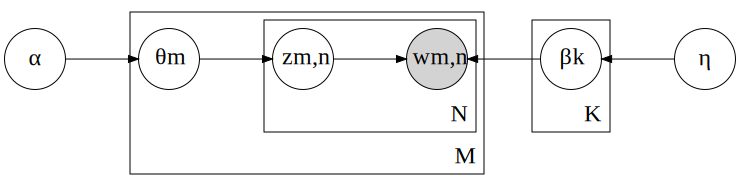

In [9]:
svg = dot_object.create_svg()
SVG(svg)